<center><h1> Introduction to NLP </h1></center>

<img src="https://www.blumeglobal.com/wp-content/uploads/2018/11/NLP-image-scaled.jpg" width=500 />


# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import re
import string
# !pip install wordcloud
from wordcloud import WordCloud

from textblob import TextBlob

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec




from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline


from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

import transformers
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          TextClassificationPipeline)

import joblib

import shap

# Import Data & Explore

In [75]:
data = pd.read_csv("US_Elections_2020.csv").drop(columns=['negative_reason'])

In [76]:
data

text  sentiment
0     b'@robreiner so afraid of Nov, Dec, and Jan! E...          0
1     b"RT @SueC00K: Lord Sumption launches Recovery...          0
2     b'RT @WalidPhares: Uber Timing: after #Biden a...          0
3     b'Every 107 seconds an American is dying from ...          1
4     b'RT @thewebbix: The #Democrats embrace #Diver...          1
...                                                 ...        ...
2547  b'RT @BoycottUtah: It is Friday, October 30, 2...          1
2548  b'@nowthisnews Delivered today in Montgomery C...          1
2549  b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...          0
2550  b'RT @Pale_Ranger: Any ideas why @JoeBiden is ...          0
2551  b'RT @cazaresforcoc: game time, keep up our mo...          1

[2552 rows x 2 columns]

In [4]:
data['text'].sample(1).values[0]

"b'November 3rd is the last day to vote! Use your vote, use your voice to get Trump out of office. This election is https://t.co/LTmQYmfIDD'"

In [5]:
data['text'].sample(1).values[0]

"b'#KAG #MAGA #TCOT #Trump2020 #CCOT\\nEveryone MUST VOTE for #TRUMP2020ToSaveAmerica \\n#SilentMajority https://t.co/BBNC8qTswb'"

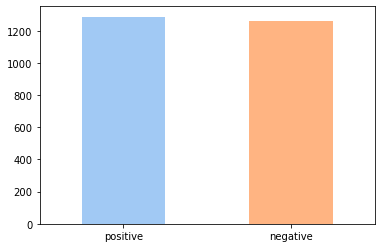

In [104]:
data['sentiment'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation=0);

# Data EDA & Preprocessing (Cleaning and Inspecting)

In [15]:
data.isna().sum()

text         0
sentiment    0
dtype: int64

### Text character-wise cleaning

In [ ]:
# regex:
#     match pattern in a string
#     handle when pattern is found
    
# re.sub(pattern, replacement, text)

# if an alphabet => keep

"match the pattern of data"  # @ & number  

nltk: natural language tool-kit
    dictionaries
    collection of words
    functions: stemming lemmatization, detect pos-tags

string
    string punctuations 


In [6]:
def change_case_lower(text):
    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    
    return sample

def remove_url(text):
    sample = text
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    
    return sample

def remove_html(text):
    sample = text
    comp = re.compile(r'<.*?>')
    sample = re.sub(comp, '', sample)
    
    return sample

def remove_punctuations(text):
    sample = text
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('[%s]' % re.escape(string.punctuation), '', sample) #punctuations
    sample = re.sub("[''""...‚Äú‚Äù‚Äò‚Äô‚Ä¶]", '', sample) #list of quotation marks
    
    return sample

only_english = set(nltk.corpus.words.words())
def remove_special_characters(text):
    sample = text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = ' '.join([w for w in nltk.wordpunct_tokenize(sample) if w.lower() in only_english or not w.isalpha()]) #doesn't remove indian languages
    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english
    sample = " ".join([x.strip() for x in sample.split()])
    
    return sample
    

def remove_hashtags_total(text):
    sample = text
    sample = re.sub('#', ' ', sample)
    
    return sample

def remove_hashtags_only(text):
    sample = text
    sample = ' '.join([x for x in s.split() if not x.startswith('#')])
    
    return sample

def remove_emojis(text):
    sample = text
    sample = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', sample) #emojis and symbols
    return sample

In [136]:
s = """@DrBiden Ask Joe about his thoughts <b> on packing </b> the Supreme Court. üòÖüòÑ He seem to have any after 50 years in politics. #JoeBiden ...more sinister" \\n\\n#Covid19UK \\n#Covid #News \\n\\nJust enter "empty testing stations" –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and https://t.co/omPuIJzVnl"""
s

'@DrBiden Ask Joe about his thoughts <b> on packing </b> the Supreme Court. üòÖüòÑ He seem to have any after 50 years in politics. #JoeBiden ...more sinister" \\n\\n#Covid19UK \\n#Covid #News \\n\\nJust enter "empty testing stations" –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and https://t.co/omPuIJzVnl'

**URLs and Hyperlinks**

In [56]:
remove_url(s)

'@DrBiden Ask Joe about his thoughts on packing the Supreme Court. üòÖüòÑ He seem to have any after 50 years in politics. #JoeBiden ...more sinister" \\n\\n#Covid19UK \\n#Covid #News \\n\\nJust enter "empty testing stations" –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and '

**remove HTML Tags**

In [146]:
remove_html(s)

'@DrBiden Ask Joe about his thoughts  on packing  the Supreme Court. üòÖüòÑ He seem to have any after 50 years in politics. #JoeBiden ...more sinister" \\n\\n#Covid19UK \\n#Covid #News \\n\\nJust enter "empty testing stations" –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and https://t.co/omPuIJzVnl'

**punctuations**

In [57]:
remove_punctuations(s)

'DrBiden Ask Joe about his thoughts on packing the Supreme Court üòÖüòÑ He seem to have any after 50 years in politics JoeBiden more sinister nnCovid19UK nCovid News nnJust enter empty testing stations –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and httpstcoomPuIJzVnl'

**lowercase**

In [81]:
change_case_lower(s)

'@drbiden ask joe about his thoughts on packing the supreme court. üòÖüòÑ he seem to have any after 50 years in politics. #joebiden ...more sinister" \\n\\n#covid19uk \\n#covid #news \\n\\njust enter "empty testing stations" —Å–≤–æ–∏–º–∏ —Ä—É–∫–∞–º–∏ into your search engine and https://t.co/ompuijzvnl'

**special characters like non-english languages, whitespace**

In [369]:
remove_special_characters(s)

'Ask Joe about his b on b the Supreme Court He seem to have any after in politics more sinister Covid19UK Covid News Just enter empty testing into your search engIne and t'

**hashtags**

In [63]:
remove_hashtags_total(s)

'@DrBiden Ask Joe about his thoughts on packing the Supreme Court. üòÖüòÑ He seem to have any after 50 years in politics.  JoeBiden ...more sinister" \\n\\n Covid19UK \\n Covid  News \\n\\nJust enter "empty testing stations" –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and https://t.co/omPuIJzVnl'

**emojis**

In [64]:
remove_emojis(s)

'@DrBiden Ask Joe about his thoughts on packing the Supreme Court.  He seem to have any after 50 years in politics. #JoeBiden ...more sinister" \\n\\n#Covid19UK \\n#Covid #News \\n\\nJust enter "empty testing stations" –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and https://t.co/omPuIJzVnl'

**COMPILING EVERYTHNG WITH IN-ORDER CONTEXT**

In [5]:
only_english = set(nltk.corpus.words.words())
def clean_text(text):
    
    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('[%s]' % re.escape(string.punctuation), '', sample) #punctuations
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...‚Äú‚Äù‚Äò‚Äô‚Ä¶]", '', sample) #list of quotation marks
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes

    
    sample = ' '.join([w for w in nltk.wordpunct_tokenize(sample) if w.lower() in only_english or not w.isalpha()]) #doesn't remove indian languages
    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english
    
    sample = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', sample) #emojis and symbols
    sample = sample.strip()
    sample = " ".join([x.strip() for x in sample.split()])
    
    return sample

In [77]:
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x))
data

text  sentiment  \
0     b'@robreiner so afraid of Nov, Dec, and Jan! E...          0   
1     b"RT @SueC00K: Lord Sumption launches Recovery...          0   
2     b'RT @WalidPhares: Uber Timing: after #Biden a...          0   
3     b'Every 107 seconds an American is dying from ...          1   
4     b'RT @thewebbix: The #Democrats embrace #Diver...          1   
...                                                 ...        ...   
2547  b'RT @BoycottUtah: It is Friday, October 30, 2...          1   
2548  b'@nowthisnews Delivered today in Montgomery C...          1   
2549  b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...          0   
2550  b'RT @Pale_Ranger: Any ideas why @JoeBiden is ...          0   
2551  b'RT @cazaresforcoc: game time, keep up our mo...          1   

                                           cleaned_text  
0     so afraid of and even if to do even more damag...  
1     lord sumption recovery a new initiative to pro...  
2     timing after said they would put pressure on b...  
3                        an is dying from the that is a  
4     the embrace for all that make our nation what ...  
...                                                 ...  
2547  it is one citizen i call for the removal from ...  
2548                                 today in county pa  
2549  lied on fox when he said the number of covid i...  
2550  any why is wasting time in this close to the e...  
2551  game time keep up our momentum and win this be...  

[2552 rows x 3 columns]

### Text word-wise cleaning

**stop words**  

Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. In order words, we can say that the removal of such words does not show any negative consequences on the model we train for our task.
Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.  

The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are ‚Äúthe‚Äù, ‚Äúa‚Äù, ‚Äúan‚Äù, ‚Äúso‚Äù, ‚Äúwhat‚Äù.  

**parts-of-speech-tagging**

<code>from nltk.corpus import wordnet
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return ''
</code>


  
    

**stemming vs lemmatizing**  

Stemming and Lemmatization are text normalization techniques.  

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.
Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for ‚Äúboat‚Äù might also return ‚Äúboats‚Äù and ‚Äúboating‚Äù. Here, ‚Äúboat‚Äù would be the stem for [boat, boater, boating, boats].   

In contrast to stemming, lemmatization looks beyond word reduction and considers a language‚Äôs full vocabulary to apply a morphological analysis to words. The lemma of ‚Äòwas‚Äô is ‚Äòbe‚Äô and the lemma of ‚Äòmice‚Äô is ‚Äòmouse‚Äô.
Lemmatization is typically seen as much more informative than simple stemming, which is why Spacy has opted to only have Lemmatization available instead of Stemming

>Stemming and Lemmatization both generate the foundation sort of the inflected words and therefore the only difference is that stem may not be an actual word whereas, lemma is an actual language word.
Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used a corpus also to supply lemma which makes it slower than stemming. you furthermore might had to define a parts-of-speech to get the proper lemma.

In [7]:
# Caching stopwords outside for better speed
stops = set(stopwords.words('english'))
def remove_stop_words(text, cores = 2):
    
    sample = text
    sample = sample.lower()
    sample = [word for word in sample.split() if not word in stops]
    sample = ' '.join(sample)
    
    return sample


# get POS Tag for word
def get_wordnet_pos(word):
    
    treebank_tag = nltk.pos_tag([word])[0][1]
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

# Lemmatizing the data
# Steps to convert : Document -> Sentences -> Tokens -> POS -> Lemmas
lemmatizer = WordNetLemmatizer()
def lemma_clean_text(text, cores = 1):
 
    sample = text
    sample = sample.split()
    sample = [lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word.lower())) for word in sample]
    sample = ' '.join(sample)
    
    return sample


# Stemming the data
ps = PorterStemmer()
def stem_clean_text(text):
 
    sample = text
    sample = sample.split()
    sample = [ps.stem(word) for word in sample]
    sample = ' '.join(sample)
    
    return sample

def correct_spelling(text):
    
    sample = text
    sample = str(TextBlob(text).correct())
    
    return sample

# wordninja=>spell correct
# profanity filter

'n'

In [85]:
s

'@DrBiden Ask Joe about his thoughts on packing the Supreme Court. üòÖüòÑ He seem to have any after 50 years in politics. #JoeBiden ...more sinister" \\n\\n#Covid19UK \\n#Covid #News \\n\\nJust enter "empty testing stations" –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and https://t.co/omPuIJzVnl'

**stop words**

In [66]:
remove_stop_words(s)

'@drbiden ask joe thoughts packing supreme court. üòÖüòÑ seem 50 years politics. #joebiden ...more sinister" \\n\\n#covid19uk \\n#covid #news \\n\\njust enter "empty testing stations" —Å–≤–æ–∏–º–∏ —Ä—É–∫–∞–º–∏ search engine https://t.co/ompuijzvnl'

**stemming**

In [84]:
stem_clean_text(s)

'@drbiden ask joe about hi thought on pack the suprem court. üòÖüòÑ He seem to have ani after 50 year in politics. #joebiden ...more sinister" \\n\\n#covid19uk \\n#covid #new \\n\\njust enter "empti test stations" —Å–≤–æ–∏–º–∏ —Ä—É–∫–∞–º–∏ into your search engin and https://t.co/ompuijzvnl'

**lemmatizing**

In [86]:
lemma_clean_text(s)

'@DrBiden Ask Joe about his thought on packing the Supreme Court. üòÖüòÑ He seem to have any after 50 year in politics. #JoeBiden ...more sinister" \\n\\n#Covid19UK \\n#Covid #News \\n\\nJust enter "empty testing stations" –°–í–û–ò–ú–ò –†–£–ö–ê–ú–ò into your search engIne and https://t.co/omPuIJzVnl'

**spell checking**

In [57]:
stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
def correct_text(text, stem=False, lemma=False, spell=False):
    if lemma and stem:
        raise Exception('Either stem or lemma can be true, not both!')
        return text
    
    sample = text
    
    #removing stopwords
    sample = sample.lower()
    sample = [word for word in sample.split() if word not in stops]
    sample = ' '.join(sample)
    
    if lemma:
        new_sample = []
        sample = sample.split()
        word_tags = [get_wordnet_pos(word.lower()) for word in sample]
        for word in sample:
            word_tag = word_tags[sample.index(word)]
            if word_tag == "":
                new_sample.append(lemmatizer.lemmatize(word))
            else:
                new_sample.append(lemmatizer.lemmatize(word.lower(), word_tag))
        sample = ' '.join(new_sample)
        
    if stem:
        sample = sample.split()
        sample = [ps.stem(word) for word in sample]
        sample = ' '.join(sample)
    
    if spell:
        sample = str(TextBlob(text).correct())
    
    return sample

In [78]:
data['correct_text'] = data['cleaned_text'].apply(lambda x: correct_text(x, lemma=True))
data

text  sentiment  \
0     b'@robreiner so afraid of Nov, Dec, and Jan! E...          0   
1     b"RT @SueC00K: Lord Sumption launches Recovery...          0   
2     b'RT @WalidPhares: Uber Timing: after #Biden a...          0   
3     b'Every 107 seconds an American is dying from ...          1   
4     b'RT @thewebbix: The #Democrats embrace #Diver...          1   
...                                                 ...        ...   
2547  b'RT @BoycottUtah: It is Friday, October 30, 2...          1   
2548  b'@nowthisnews Delivered today in Montgomery C...          1   
2549  b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...          0   
2550  b'RT @Pale_Ranger: Any ideas why @JoeBiden is ...          0   
2551  b'RT @cazaresforcoc: game time, keep up our mo...          1   

                                           cleaned_text  \
0     so afraid of and even if to do even more damag...   
1     lord sumption recovery a new initiative to pro...   
2     timing after said they would put pressure on b...   
3                        an is dying from the that is a   
4     the embrace for all that make our nation what ...   
...                                                 ...   
2547  it is one citizen i call for the removal from ...   
2548                                 today in county pa   
2549  lied on fox when he said the number of covid i...   
2550  any why is wasting time in this close to the e...   
2551  game time keep up our momentum and win this be...   

                                           correct_text  
0                               afraid even even damage  
1     lord sumption recovery new initiative promote ...  
2         timing say would put pressure brazil sanction  
3                                                   die  
4                       embrace make nation u must vote  
...                                                 ...  
2547              one citizen call removal office legal  
2548                                    today county pa  
2549       lie fox say number covid almost nothing tell  
2550                     waste time close election like  
2551  game time keep momentum win sure drop ballot p...  

[2552 rows x 4 columns]

### Feature Extraction and EDA

**word count**

In [79]:
data['word_count'] = data['correct_text'].apply(lambda x: len(str(x).split(" ")))
data[['correct_text','word_count']]

correct_text  word_count
0                               afraid even even damage           4
1     lord sumption recovery new initiative promote ...          10
2         timing say would put pressure brazil sanction           7
3                                                   die           1
4                       embrace make nation u must vote           6
...                                                 ...         ...
2547              one citizen call removal office legal           6
2548                                    today county pa           3
2549       lie fox say number covid almost nothing tell           8
2550                     waste time close election like           5
2551  game time keep momentum win sure drop ballot p...          11

[2552 rows x 2 columns]

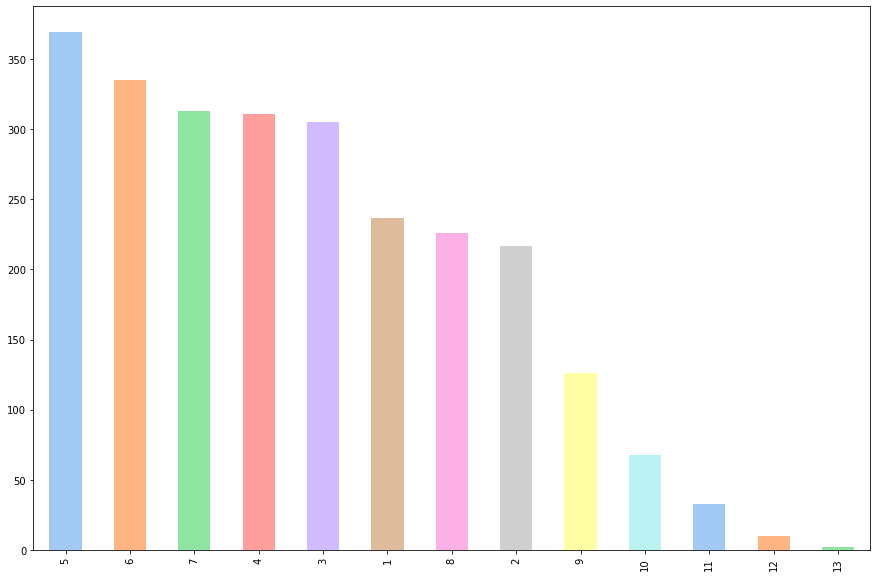

In [12]:
plt.figure(figsize=(15,10))
data['word_count'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))

**character count**

In [80]:
data['char_count'] = data['correct_text'].str.len() ## this also includes spaces
data[['correct_text','char_count']]

correct_text  char_count
0                               afraid even even damage          23
1     lord sumption recovery new initiative promote ...          70
2         timing say would put pressure brazil sanction          45
3                                                   die           3
4                       embrace make nation u must vote          31
...                                                 ...         ...
2547              one citizen call removal office legal          37
2548                                    today county pa          15
2549       lie fox say number covid almost nothing tell          44
2550                     waste time close election like          30
2551  game time keep momentum win sure drop ballot p...          63

[2552 rows x 2 columns]

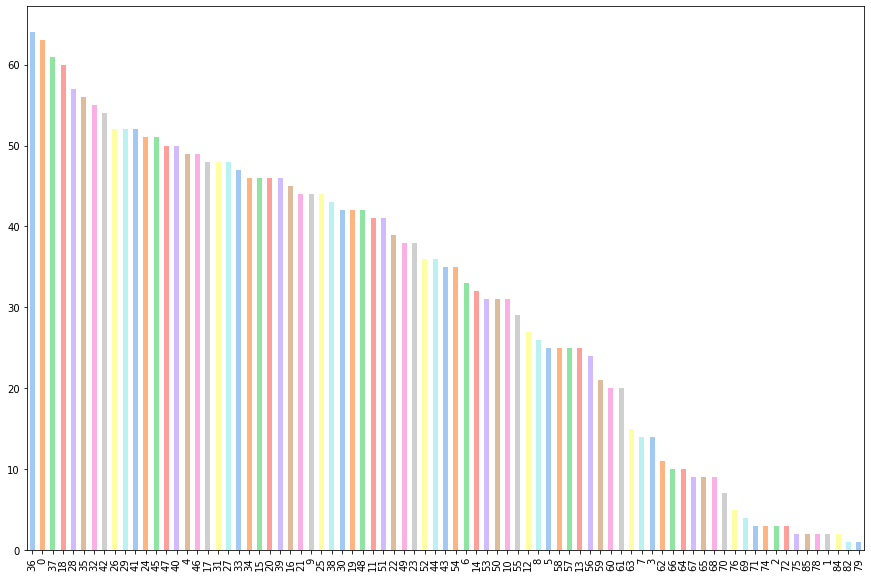

In [16]:
plt.figure(figsize=(15,10))
data['char_count'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))

**average word count**

In [81]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+0.000001))

data['avg_word'] = data['correct_text'].apply(lambda x: avg_word(x)).round(1)
data[['correct_text','avg_word']].head()

correct_text  avg_word
0                            afraid even even damage       5.0
1  lord sumption recovery new initiative promote ...       6.1
2      timing say would put pressure brazil sanction       5.6
3                                                die       3.0
4                    embrace make nation u must vote       4.3

In [18]:
plt.figure(figsize=(15,10))
data['avg_word'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))

In [82]:
final_data = data[['correct_text', 'word_count', 'char_count', 'avg_word', 'sentiment']]
final_data

correct_text  word_count  \
0                               afraid even even damage           4   
1     lord sumption recovery new initiative promote ...          10   
2         timing say would put pressure brazil sanction           7   
3                                                   die           1   
4                       embrace make nation u must vote           6   
...                                                 ...         ...   
2547              one citizen call removal office legal           6   
2548                                    today county pa           3   
2549       lie fox say number covid almost nothing tell           8   
2550                     waste time close election like           5   
2551  game time keep momentum win sure drop ballot p...          11   

      char_count  avg_word  sentiment  
0             23       5.0          0  
1             70       6.1          0  
2             45       5.6          0  
3              3       3.0          1  
4             31       4.3          1  
...          ...       ...        ...  
2547          37       5.3          1  
2548          15       4.3          1  
2549          44       4.6          0  
2550          30       5.2          0  
2551          63       4.8          1  

[2552 rows x 5 columns]

## Word Clouds

Check: https://www.kaggle.com/code/arthurtok/spooky-nlp-and-topic-modelling-tutorial/notebook

### Positive Tweets

In [83]:
g = str(data[data['sentiment']==0]['correct_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

### Negative Tweets

In [87]:
g = str(data[data['sentiment']==1]['correct_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

# Corpus Assembly & Modeling

### Word Embeddings

Checkout this great blog from [Turing](https://www.turing.com/kb/guide-on-word-embeddings-in-nlp)

In [108]:
X = final_data.drop(columns=['sentiment'])
y = final_data['sentiment']
z = final_data.drop(columns=['correct_text', 'sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [89]:
X_train.isna().sum()

correct_text    0
word_count      0
char_count      0
avg_word        0
dtype: int64

 y-> target  
x -> text  
z -> other numerical features

In [90]:
z_train = X_train.drop(columns=['correct_text'])
z_test = X_test.drop(columns=['correct_text'])

X_train = X_train['correct_text']
X_test = X_test['correct_text']

In [91]:
X_train.fillna(" ", axis=0, inplace=True)
X_test.fillna(" ", axis=0, inplace=True)
y_train.fillna(0.0, inplace=True)
y_test.fillna(1.0, inplace=True)

In [92]:
X_train

2268                 instead prison due enforce death row
407                                  mother son self last
2169                                                     
807                                  buck kick trump curb
456                                             add trump
                              ...                        
599                            look recent seem desperate
1599       create complacency forget tell u get vote vote
1361    happy birthday love life one woman turn like w...
1547                                            overwhelm
863                    idiot oh yeah dick pic feather say
Name: correct_text, Length: 1709, dtype: object

In [93]:
z_test

word_count  char_count  avg_word
1018           1           4       4.0
2117           6          42       6.2
2122           2           9       4.0
2201           3          17       5.0
2147           4          28       6.2
...          ...         ...       ...
1211           2          14       6.5
1162           7          42       5.1
395            5          21       3.4
2355           5          26       4.4
2221           3          18       5.3

[843 rows x 3 columns]

**BagOfWords (CBOW)**


The idea is to analyze the documents. The document here refers to a unit. In case we want to find all the negative tweets during the pandemic, each tweet here is a document. To obtain the bag of words we always perform all those pre-requisite steps like cleaning, stemming, lemmatization, etc‚Ä¶ Then we generate a set of all the words that are available before sending it for modeling. We can get repeated words within our document. A better representation is a vector form, that can tell us how many times each word can occur in a document. The following is called a document term matrix and is shown below:

<img src="https://qph.fs.quoracdn.net/main-qimg-27639a9e2f88baab88a2c575a1de2005">

row1: "Today is independence day" {"Today":0, "is": 1, "independence": 2, "day": 3}
row2: "independence day is celebrated"  {"independence":0, "day": 1, "is": 2, "celebrated": 3}
       independece
1    (value=freq=1)

In [20]:
bow = CountVectorizer(max_features=500)

In [21]:
X_train_vect = bow.fit_transform(X_train)
X_test_vect = bow.transform(X_test)


# fit(train)
# transform(train)
# transform(test)

In [22]:
x_t1 = pd.DataFrame(X_train_vect.toarray(),columns=bow.get_feature_names())
x_t2 = pd.DataFrame(X_test_vect.toarray(),columns=bow.get_feature_names())

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [23]:
x_t1

able  absentee  actually  ago  ahead  almost  already  also  always  \
0        0         0         0    0      0       0        0     0       0   
1        0         0         0    0      0       0        0     0       0   
2        0         0         0    0      0       0        0     0       0   
3        0         0         0    0      0       0        0     0       0   
4        0         0         0    0      0       0        0     0       0   
...    ...       ...       ...  ...    ...     ...      ...   ...     ...   
1704     0         0         0    0      0       0        0     0       0   
1705     0         0         0    0      0       0        0     0       0   
1706     0         0         0    0      0       0        0     0       0   
1707     0         0         0    0      0       0        0     0       0   
1708     0         0         0    0      0       0        0     0       0   

      angry  ...  worse  worst  would  wrong  year  yelling  yesterday  yet  \
0         0  ...      0      0      0      0     0        0          0    0   
1         0  ...      0      0      0      0     0        0          0    0   
2         0  ...      0      0      0      0     0        0          0    0   
3         0  ...      0      0      0      0     0        0          0    0   
4         0  ...      0      0      0      0     0        0          0    0   
...     ...  ...    ...    ...    ...    ...   ...      ...        ...  ...   
1704      0  ...      0      0      0      0     0        0          0    0   
1705      0  ...      0      0      0      0     0        0          0    0   
1706      0  ...      0      0      0      0     0        0          0    0   
1707      0  ...      0      0      0      0     0        0          0    0   
1708      0  ...      0      0      0      0     0        0          0    0   

      young  zero  
0         0     0  
1         0     0  
2         0     0  
3         0     0  
4         0     0  
...     ...   ...  
1704      0     0  
1705      0     0  
1706      0     0  
1707      0     0  
1708      0     0  

[1709 rows x 500 columns]

In [24]:
x_train = pd.concat([x_t1, z_train.reset_index(drop=True)], axis=1)
x_test = pd.concat([x_t2, z_test.reset_index(drop=True)], axis=1)

In [25]:
x_train

able  absentee  actually  ago  ahead  almost  already  also  always  \
0        0         0         0    0      0       0        0     0       0   
1        0         0         0    0      0       0        0     0       0   
2        0         0         0    0      0       0        0     0       0   
3        0         0         0    0      0       0        0     0       0   
4        0         0         0    0      0       0        0     0       0   
...    ...       ...       ...  ...    ...     ...      ...   ...     ...   
1704     0         0         0    0      0       0        0     0       0   
1705     0         0         0    0      0       0        0     0       0   
1706     0         0         0    0      0       0        0     0       0   
1707     0         0         0    0      0       0        0     0       0   
1708     0         0         0    0      0       0        0     0       0   

      angry  ...  wrong  year  yelling  yesterday  yet  young  zero  \
0         0  ...      0     0        0          0    0      0     0   
1         0  ...      0     0        0          0    0      0     0   
2         0  ...      0     0        0          0    0      0     0   
3         0  ...      0     0        0          0    0      0     0   
4         0  ...      0     0        0          0    0      0     0   
...     ...  ...    ...   ...      ...        ...  ...    ...   ...   
1704      0  ...      0     0        0          0    0      0     0   
1705      0  ...      0     0        0          0    0      0     0   
1706      0  ...      0     0        0          0    0      0     0   
1707      0  ...      0     0        0          0    0      0     0   
1708      0  ...      0     0        0          0    0      0     0   

      word_count  char_count  avg_word  
0              6          36       5.2  
1              4          20       4.2  
2              1           0       0.0  
3              4          20       4.2  
4              2          11       5.0  
...          ...         ...       ...  
1704           4          26       5.7  
1705           8          47       5.0  
1706          11          61       4.6  
1707           1          12      12.0  
1708           7          34       4.0  

[1709 rows x 503 columns]

In [28]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [29]:
print("logloss: %0.3f " % log_loss(y_test.values, pred))

logloss: 10.243 


**Tf-Idf**

One problem that we encounter in the bag-of-words approach is that it treats every word equally, but in a document, there is a high chance of particular words being repeated more often than others. if we take each sentence as a document, we can count the number of documents each time any word occurs. This method is called document-frequency. We then divide the term frequency by the document frequency of that word. This helps us with the frequency of occurrence of terms in that document and inverse to the number of documents it appears in. Thus we have the TF-IDF. The idea is to assign particular weights to words that tell us about how important they are in the document.

<img src="https://d2mk45aasx86xg.cloudfront.net/How_word_embedding_is_done_in_TF_IDF_f8cf27a728.webp" />

<img src="https://editor.analyticsvidhya.com/uploads/88298tfidf_ex3.png">

In [30]:
tfidf = TfidfVectorizer(stop_words='english')

In [31]:
X_train_vect = tfidf.fit_transform(X_train)
X_test_vect = tfidf.transform(X_test)

In [32]:
x_t1 = pd.DataFrame(X_train_vect.toarray(),columns=tfidf.get_feature_names())
x_t2 = pd.DataFrame(X_test_vect.toarray(),columns=tfidf.get_feature_names())

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [33]:
x_t1

abandon  abandoned  abject  able  abolish  abomination  abortion  \
0         0.0        0.0     0.0   0.0      0.0          0.0       0.0   
1         0.0        0.0     0.0   0.0      0.0          0.0       0.0   
2         0.0        0.0     0.0   0.0      0.0          0.0       0.0   
3         0.0        0.0     0.0   0.0      0.0          0.0       0.0   
4         0.0        0.0     0.0   0.0      0.0          0.0       0.0   
...       ...        ...     ...   ...      ...          ...       ...   
1704      0.0        0.0     0.0   0.0      0.0          0.0       0.0   
1705      0.0        0.0     0.0   0.0      0.0          0.0       0.0   
1706      0.0        0.0     0.0   0.0      0.0          0.0       0.0   
1707      0.0        0.0     0.0   0.0      0.0          0.0       0.0   
1708      0.0        0.0     0.0   0.0      0.0          0.0       0.0   

      absence  absentee  absolute  ...  young  younger  youth  youthful  \
0         0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
1         0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
2         0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
3         0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
4         0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
...       ...       ...       ...  ...    ...      ...    ...       ...   
1704      0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
1705      0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
1706      0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
1707      0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   
1708      0.0       0.0       0.0  ...    0.0      0.0    0.0       0.0   

      youve   yr  yuck  zero  zeta  zip  
0       0.0  0.0   0.0   0.0   0.0  0.0  
1       0.0  0.0   0.0   0.0   0.0  0.0  
2       0.0  0.0   0.0   0.0   0.0  0.0  
3       0.0  0.0   0.0   0.0   0.0  0.0  
4       0.0  0.0   0.0   0.0   0.0  0.0  
...     ...  ...   ...   ...   ...  ...  
1704    0.0  0.0   0.0   0.0   0.0  0.0  
1705    0.0  0.0   0.0   0.0   0.0  0.0  
1706    0.0  0.0   0.0   0.0   0.0  0.0  
1707    0.0  0.0   0.0   0.0   0.0  0.0  
1708    0.0  0.0   0.0   0.0   0.0  0.0  

[1709 rows x 2414 columns]

In [34]:
x_train = pd.concat([x_t1, z_train.reset_index(drop=True)], axis=1)
x_test = pd.concat([x_t2, z_test.reset_index(drop=True)], axis=1)

In [35]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [36]:
print("logloss: %0.3f " % log_loss(y_test.values, pred))

logloss: 10.530 


**Word2Vec (Skip-Gram)**

Word2Vec is widely used in most of the NLP models. It transforms the word into vectors. Word2vec is a two-layer net that processes text with words. The input is in the text corpus and the output is a set of vectors: feature vectors represent the words on that corpus.


Given enough data, usage, and conditions, Word2vec can make the most accurate predictions about the meaning of a word based on previous appearances. That guess can be used to form word-and-word combinations (eg ‚Äúbig‚Äù i.e. ‚Äúlarge‚Äù to say ‚Äúsmall‚Äù is ‚Äútiny‚Äù), or group texts and separate them by topic.


**GloVe**

GloVe ‚Äì global vector for word representation. An unsupervised learning algorithm by Stanford is used to generate embedding words by combining a word matrix for the word co-occurrence of matrix from the corpus. Emerging embedded text shows an attractive line format for a word in a vector space. The GloVe model is trained in the zero-level global co-occurrence matrix, which shows how often words meet in a particular corpus.

<img src="https://editor.analyticsvidhya.com/uploads/619221_gcC7b_v7OKWutYN1NAHyMQ.png">

In [110]:
class Word_to_Vect():
    '''Function that returns word embedding, if passed list of sentences and size of vector'''
    
    def __init__(self):
        pass
    
    def w2v(self, corpus, size):
        
        #tokenization and model preparation
        tokenize_sent = [sent.split() for sent in corpus]
        #creating vord2vec for every word in every sentence in corpus
        self.w2v = word2vec.Word2Vec(tokenize_sent, size=size, min_count=1)
        
        return self.w2v
    
    def transform(self, X_corpus, size):
        
        array_wordEmbed = []
        for sent in X_corpus:
            vec = np.zeros(size).reshape((1, size))
            count = 0.
            if sent == '':
                a = vec
            else:
                sent = sent.split(' ')
                for word in sent:
                    vec += w2v[word].reshape((1,size))
                    count +=1
            if count !=0:
                vec /= count
            a = vec
            array_wordEmbed.append(a)
        return np.concatenate(tuple(array_wordEmbed))

In [111]:
w2v = Word_to_Vect().w2v(corpus = [sent for sent in X['correct_text']], size = len(X['correct_text']))

model's vocab gives the dictionary of words along with their vector values,  
and the values of the dictionary will give you the value of that word  

**Example**

In [35]:
w2v.wv.similar_by_vector('bad')

# worse trump

[('trump', 0.4643580913543701),
 ('covid', 0.43957382440567017),
 ('people', 0.41464903950691223),
 ('us', 0.4014951288700104),
 ('get', 0.39459118247032166),
 ('like', 0.3792682886123657),
 ('many', 0.3768415153026581),
 ('new', 0.37580370903015137),
 ('man', 0.3708970844745636),
 ('election', 0.3694921135902405)]

***We can create the document-term matrix by creating a dictionary with `"word": "value"`, using the below function***

In [37]:
X_w2v = pd.DataFrame({word:w2v.wv[word] for sent in X['correct_text'] for word in sent.split()})
X_w2v

afraid      even    damage      lord  sumption  recovery       new  \
0    -0.000014 -0.000001  0.000136  0.000020 -0.000095  0.000128 -0.000051   
1     0.000097  0.000057 -0.000123 -0.000179 -0.000150 -0.000040  0.000002   
2    -0.000064 -0.000289  0.000080 -0.000039 -0.000099  0.000176 -0.000122   
3     0.000044  0.000074 -0.000121 -0.000022 -0.000088 -0.000047 -0.000131   
4    -0.000070  0.000110 -0.000102  0.000141 -0.000087 -0.000019  0.000090   
...        ...       ...       ...       ...       ...       ...       ...   
2547  0.000020  0.000078 -0.000100  0.000046 -0.000080 -0.000100  0.000158   
2548 -0.000169  0.000025 -0.000012 -0.000031  0.000019  0.000110  0.000267   
2549 -0.000028 -0.000076 -0.000110 -0.000010  0.000117  0.000036  0.000052   
2550 -0.000016  0.000173  0.000188 -0.000015 -0.000036  0.000055  0.000100   
2551 -0.000142 -0.000040  0.000073 -0.000121  0.000152  0.000155 -0.000202   

      initiative   promote      deal  ...      rent  drlimengyan1  pneumonia  \
0       0.000121  0.000187 -0.000149  ...  0.000099     -0.000003   0.000068   
1      -0.000037  0.000192 -0.000179  ... -0.000052     -0.000044  -0.000059   
2      -0.000201  0.000097 -0.000122  ...  0.000029      0.000019   0.000001   
3       0.000019 -0.000068 -0.000141  ...  0.000125     -0.000195   0.000046   
4       0.000045  0.000144  0.000191  ...  0.000024     -0.000058   0.000167   
...          ...       ...       ...  ...       ...           ...        ...   
2547    0.000148 -0.000085 -0.000072  ... -0.000010      0.000075   0.000036   
2548    0.000149  0.000067  0.000123  ...  0.000060      0.000153   0.000076   
2549   -0.000163 -0.000184 -0.000048  ...  0.000142      0.000177   0.000057   
2550   -0.000172  0.000032 -0.000086  ... -0.000173      0.000140   0.000153   
2551    0.000192  0.000073  0.000113  ... -0.000104     -0.000085   0.000193   

        erased   wishful  epidemic     click  wherever   younger  brainwashing  
0     0.000094 -0.000139  0.000054  0.000123  0.000099  0.000025      0.000175  
1     0.000020  0.000116 -0.000083 -0.000071  0.000138  0.000074     -0.000088  
2     0.000137 -0.000135  0.000039 -0.000194 -0.000152 -0.000032      0.000185  
3    -0.000182 -0.000182 -0.000036  0.000092 -0.000072 -0.000104     -0.000183  
4    -0.000078  0.000126  0.000103  0.000003  0.000077 -0.000156     -0.000088  
...        ...       ...       ...       ...       ...       ...           ...  
2547 -0.000008  0.000192 -0.000018 -0.000096  0.000131 -0.000007     -0.000121  
2548 -0.000042 -0.000068 -0.000023 -0.000088 -0.000020  0.000065      0.000006  
2549  0.000147 -0.000135  0.000078  0.000089  0.000010  0.000087      0.000120  
2550  0.000039 -0.000125  0.000091 -0.000075  0.000118 -0.000156      0.000197  
2551  0.000007 -0.000150  0.000062  0.000147 -0.000011  0.000029      0.000003  

[2552 rows x 3197 columns]

In [38]:
x_t1, x_t2, _, _ = train_test_split(X_w2v, y, test_size=0.33, random_state=101)

In [39]:
x_t2

afraid      even    damage      lord  sumption  recovery  \
1018 -0.000046  0.000251 -0.000016  0.000031  0.000009 -0.000175   
2117  0.000123  0.000183 -0.000016  0.000098 -0.000178 -0.000070   
2122 -0.000031 -0.000237  0.000159 -0.000033  0.000132  0.000033   
2201  0.000066 -0.000126  0.000001 -0.000143  0.000113 -0.000128   
2147  0.000100  0.000099  0.000032 -0.000074 -0.000097  0.000111   
...        ...       ...       ...       ...       ...       ...   
1211 -0.000086  0.000075 -0.000080  0.000131  0.000087 -0.000044   
1162 -0.000137 -0.000003  0.000112 -0.000194  0.000153 -0.000055   
395  -0.000113  0.000070  0.000161  0.000096 -0.000117 -0.000081   
2355 -0.000142 -0.000082 -0.000012  0.000038  0.000088  0.000129   
2221 -0.000043  0.000283  0.000201  0.000076  0.000130  0.000107   

               new  initiative       promote      deal  ...      rent  \
1018  3.567776e-04    0.000174  1.653559e-04 -0.000118  ... -0.000145   
2117  3.148946e-05    0.000092 -1.398799e-04 -0.000092  ...  0.000010   
2122 -2.211958e-04   -0.000168  4.510279e-05 -0.000176  ...  0.000146   
2201 -5.120810e-09    0.000150 -2.376292e-05  0.000113  ... -0.000113   
2147 -8.794261e-05   -0.000015 -7.050798e-07  0.000187  ... -0.000116   
...            ...         ...           ...       ...  ...       ...   
1211  2.664547e-04    0.000010  1.274988e-04  0.000069  ...  0.000052   
1162 -4.776164e-04   -0.000140  1.359133e-04 -0.000065  ... -0.000175   
395  -7.428045e-05   -0.000189  1.505166e-04  0.000056  ... -0.000163   
2355  1.691388e-05    0.000137  1.778394e-05 -0.000093  ...  0.000086   
2221  3.911176e-04   -0.000014 -1.747668e-04  0.000111  ... -0.000186   

      drlimengyan1  pneumonia    erased   wishful  epidemic     click  \
1018     -0.000180   0.000002  0.000037 -0.000158 -0.000099 -0.000186   
2117      0.000034  -0.000191  0.000096  0.000038 -0.000169  0.000154   
2122     -0.000167   0.000087  0.000184  0.000085  0.000141 -0.000009   
2201      0.000143   0.000040 -0.000111 -0.000131 -0.000008 -0.000178   
2147     -0.000050  -0.000127 -0.000161 -0.000127  0.000088 -0.000003   
...            ...        ...       ...       ...       ...       ...   
1211      0.000060   0.000154 -0.000177 -0.000138 -0.000129  0.000035   
1162     -0.000189   0.000001  0.000035 -0.000012  0.000179 -0.000131   
395       0.000147   0.000185  0.000029 -0.000143  0.000183 -0.000082   
2355     -0.000020  -0.000148 -0.000117  0.000110 -0.000163  0.000108   
2221      0.000002  -0.000144 -0.000185 -0.000042  0.000189 -0.000042   

      wherever   younger  brainwashing  
1018  0.000149 -0.000052     -0.000100  
2117 -0.000054 -0.000054     -0.000065  
2122  0.000081  0.000145     -0.000088  
2201 -0.000006  0.000119      0.000194  
2147 -0.000190 -0.000153     -0.000122  
...        ...       ...           ...  
1211 -0.000162  0.000060      0.000057  
1162 -0.000077 -0.000008      0.000175  
395   0.000015  0.000003     -0.000010  
2355 -0.000171 -0.000084     -0.000019  
2221 -0.000188 -0.000110      0.000177  

[843 rows x 3197 columns]

In [40]:
x_train = pd.concat([x_t1.reset_index(drop=True), z_train.reset_index(drop=True)], axis=1)
x_test = pd.concat([x_t2.reset_index(drop=True), z_test.reset_index(drop=True)], axis=1)

In [41]:
clf = XGBClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

d:\softwares\python3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\softwares\python3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [45]:
print("logloss: %0.3f " % log_loss(y_test.values, pred))

logloss: 16.102 


# Modelling


1. ML Algorithms
2. DL Neural Networks


### Metrics?
Same as those we use in traditional ML, and other functions such as **Perplexity** or Logloss

<a href="https://towardsdatascience.com/perplexity-in-language-models-87a196019a94"><img src="https://miro.medium.com/max/828/1*DGceUxPPeIgE-V1m3SF-SA.png"/></a>


**Machine leaning**

In [37]:
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, min_samples_split=5)
rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=500)

In [38]:
y_pred_ml = rf.predict(x_test)
print("logloss: %0.3f " % log_loss(y_pred_ml, pred))

logloss: 7.211 


**Deep learning**

In [92]:
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
#     plot_model(model, to_file='model.png', show_shapes=True)
    return model

model = define_model(x_train.shape[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                120900    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 120,951
Trainable params: 120,951
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(np.asarray(x_train), np.asarray(y_train), epochs=50, batch_size=50)
# evaluate
loss, acc = model.evaluate(np.asarray(x_test), np.asarray(y_test))
print('Test Accuracy: %f' % (acc*100))

Train on 1709 samples
Epoch 1/50
1709/1709 [==============================] - 0s 224us/sample - loss: 0.6945 - acc: 0.5535
Epoch 2/50
1709/1709 [==============================] - 0s 131us/sample - loss: 0.6624 - acc: 0.6202
Epoch 3/50
1709/1709 [==============================] - 0s 152us/sample - loss: 0.6355 - acc: 0.6782
Epoch 4/50
1709/1709 [==============================] - 0s 154us/sample - loss: 0.6120 - acc: 0.7150
Epoch 5/50
1709/1709 [==============================] - 0s 162us/sample - loss: 0.5873 - acc: 0.7384
Epoch 6/50
1709/1709 [==============================] - 0s 192us/sample - loss: 0.5608 - acc: 0.7800
Epoch 7/50
1709/1709 [==============================] - 0s 180us/sample - loss: 0.5295 - acc: 0.8327
Epoch 8/50
1709/1709 [==============================] - 0s 179us/sample - loss: 0.5021 - acc: 0.8444
Epoch 9/50
1709/1709 [==============================] - 0s 184us/sample - loss: 0.4696 - acc: 0.8683
Epoch 10/50
1709/1709 [==============================] - 0s 189us/sam

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [81]:
y_pred_dl = model.predict(x_test)

print("logloss: %0.3f " % log_loss(y_test, y_pred_dl.round(), eps=1e-7))

logloss: 4.562 
